# Apartment Prices in Poland

dataset : https://www.kaggle.com/datasets/krzysztofjamroz/apartment-prices-in-poland

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
file_format = "/content/apartments_pl_{}.csv"
date = ["2023_08", "2023_09", "2023_10", "2023_11", "2023_12", "2024_01", "2024_02", "2024_03"]

dfs = [pd.read_csv(file_format.format(i)) for i in date]
df = pd.concat(dfs, ignore_index=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134577 entries, 0 to 134576
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    134577 non-null  object 
 1   city                  134577 non-null  object 
 2   type                  104834 non-null  object 
 3   squareMeters          134577 non-null  float64
 4   rooms                 134577 non-null  float64
 5   floor                 110315 non-null  float64
 6   floorCount            132816 non-null  float64
 7   buildYear             112014 non-null  float64
 8   latitude              134577 non-null  float64
 9   longitude             134577 non-null  float64
 10  centreDistance        134577 non-null  float64
 11  poiCount              134577 non-null  float64
 12  schoolDistance        134438 non-null  float64
 13  clinicDistance        134029 non-null  float64
 14  postOfficeDistance    134388 non-null  float64
 15  

In [4]:
df.head(3)

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,...,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,...,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes,395995
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,134577,66374,1910d7672dd1b828963d11f6eda546e1,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,134577,15,warszawa,39764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,104834,3,blockOfFlats,61496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
squareMeters,134577.0,NaN,NaN,NaN,59.294263,21.655125,25.0,44.54,55.2,69.5,150.0
rooms,134577.0,NaN,NaN,NaN,2.699377,0.922813,1.0,2.0,3.0,3.0,6.0
floor,110315.0,NaN,NaN,NaN,3.308236,2.509341,1.0,2.0,3.0,4.0,29.0
floorCount,132816.0,NaN,NaN,NaN,5.25076,3.28065,1.0,3.0,4.0,6.0,29.0
buildYear,112014.0,NaN,NaN,NaN,1985.492421,34.196434,1850.0,1966.0,1994.0,2015.0,2024.0
latitude,134577.0,NaN,NaN,NaN,52.041489,1.345714,49.978999,51.111284,52.19557,52.43629,54.60646
longitude,134577.0,NaN,NaN,NaN,19.464464,1.789353,14.447127,18.51753,19.895814,20.99074,23.207128


In [6]:
droping_cols = ['id', 'condition']
df.drop(droping_cols, axis=1, inplace=True)

In [7]:
df.head().T

,0,1,2,3,4
city,szczecin,szczecin,szczecin,szczecin,szczecin
type,blockOfFlats,blockOfFlats,tenement,tenement,blockOfFlats
squareMeters,63.0,36.0,73.02,87.6,66.0
rooms,3.0,2.0,3.0,3.0,3.0
floor,4.0,8.0,2.0,2.0,1.0
floorCount,10.0,10.0,3.0,3.0,3.0
buildYear,1980.0,NaN,NaN,NaN,NaN
latitude,53.378933,53.442692,53.452222,53.4351,53.410278
longitude,14.625296,14.55969,14.553333,14.5329,14.503611
centreDistance,6.53,2.15,3.24,2.27,4.07


In [8]:
df.columns

Index(['city', 'type', 'squareMeters', 'rooms', 'floor', 'floorCount',
       'buildYear', 'latitude', 'longitude', 'centreDistance', 'poiCount',
       'schoolDistance', 'clinicDistance', 'postOfficeDistance',
       'kindergartenDistance', 'restaurantDistance', 'collegeDistance',
       'pharmacyDistance', 'ownership', 'buildingMaterial', 'hasParkingSpace',
       'hasBalcony', 'hasElevator', 'hasSecurity', 'hasStorageRoom', 'price'],
      dtype='object')

### sorting columns by their types for making preprocessing easier

In [9]:
df = df[['squareMeters', 'rooms', 'floor', 'floorCount',
        'buildYear', 'latitude', 'longitude', 'centreDistance', 'poiCount',
        'schoolDistance', 'clinicDistance', 'postOfficeDistance',
        'kindergartenDistance', 'restaurantDistance', 'collegeDistance',
        'pharmacyDistance',  'hasParkingSpace',
        'hasBalcony', 'hasElevator', 'hasSecurity', 'hasStorageRoom',
        'buildingMaterial', 'ownership','type', 'city', 'price']]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134577 entries, 0 to 134576
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   squareMeters          134577 non-null  float64
 1   rooms                 134577 non-null  float64
 2   floor                 110315 non-null  float64
 3   floorCount            132816 non-null  float64
 4   buildYear             112014 non-null  float64
 5   latitude              134577 non-null  float64
 6   longitude             134577 non-null  float64
 7   centreDistance        134577 non-null  float64
 8   poiCount              134577 non-null  float64
 9   schoolDistance        134438 non-null  float64
 10  clinicDistance        134029 non-null  float64
 11  postOfficeDistance    134388 non-null  float64
 12  kindergartenDistance  134420 non-null  float64
 13  restaurantDistance    134211 non-null  float64
 14  collegeDistance       130752 non-null  float64
 15  

In [11]:
X = df.drop("price", axis=1).values
y = df['price'].values

In [12]:
from sklearn.impute import SimpleImputer

imputer_1 = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_2 = SimpleImputer(strategy='most_frequent')
X[:, :16] = imputer_1.fit_transform(X[:, :16])
X[:, 16:] = imputer_2.fit_transform(X[:, 16:])

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in range(16,22):
    X[:, i] = le.fit_transform(X[:, i])

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [22, 23, 24])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [15]:
from sklearn.model_selection import train_test_split

X = X.astype('float32')
y = y.astype('float32')


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

### Trying to find the best learning rate
> Using `tf.keras.LearningRateScheduler`

In [17]:
tf.random.set_seed(42)

# creating a model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X[0].shape),
    tf.keras.layers.Dense(units=24, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=24, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=1, activation=tf.keras.activations.linear)
])

# compiling the model we just created
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

# setting up a callback function for finding the best learning rate
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

# fitting our model with train data
history = model.fit(X_train,
                    y_train,
                    epochs=40,
                    callbacks=[lr_scheduler])

Epoch 1/40
3365/3365 [==============================] - 9s 2ms/step - loss: 765473.8125 - mae: 765473.8125 - lr: 1.0000e-04
Epoch 2/40
3365/3365 [==============================] - 7s 2ms/step - loss: 764958.1875 - mae: 764958.1875 - lr: 1.1220e-04
Epoch 3/40
3365/3365 [==============================] - 8s 2ms/step - loss: 763322.0625 - mae: 763322.0625 - lr: 1.2589e-04
Epoch 4/40
3365/3365 [==============================] - 8s 2ms/step - loss: 759629.5625 - mae: 759629.5625 - lr: 1.4125e-04
Epoch 5/40
3365/3365 [==============================] - 7s 2ms/step - loss: 752389.5000 - mae: 752389.5000 - lr: 1.5849e-04
Epoch 6/40
3365/3365 [==============================] - 8s 2ms/step - loss: 739272.3750 - mae: 739272.3750 - lr: 1.7783e-04
Epoch 7/40
3365/3365 [==============================] - 7s 2ms/step - loss: 716827.5000 - mae: 716827.5000 - lr: 1.9953e-04
Epoch 8/40
3365/3365 [==============================] - 8s 2ms/step - loss: 679902.7500 - mae: 679902.7500 - lr: 2.2387e-04
Epoch 9/

#### Here i'm going to visulize loss/learning rate to see with what learning rate our model gets the best slop and lowest point in chart

Text(0.5, 1.0, 'Learning rate Vs Loss')

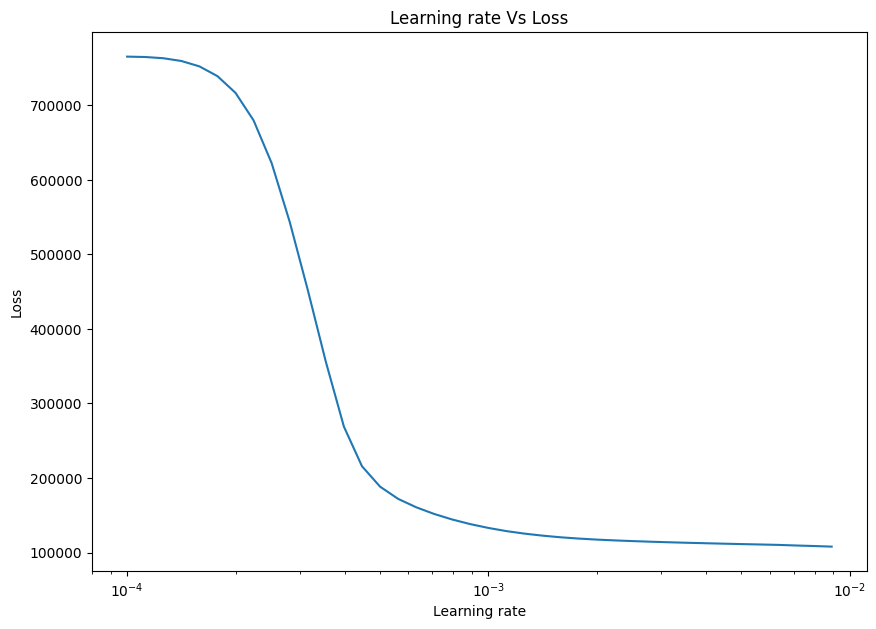

In [19]:
lrs = 1e-4 * 10 ** (tf.range(40)/20)
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel('Loss')
plt.title('Learning rate Vs Loss')

In [20]:
tf.random.set_seed(42)

nn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X[0].shape),
    tf.keras.layers.Dense(units=24, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=24, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=1, activation=tf.keras.activations.linear)
])

nn.compile(loss=tf.keras.losses.mae,
           optimizer=tf.keras.optimizers.Adam(learning_rate=0.0007),
           metrics=['mae'])

nn.fit(X_train,
       y_train,
       epochs=50,
       validation_data=(X_val, y_val))

Epoch 1/50
3365/3365 [==============================] - 8s 2ms/step - loss: 746004.6875 - mae: 746004.6875 - val_loss: 699910.5625 - val_mae: 699910.5625
Epoch 2/50
3365/3365 [==============================] - 8s 2ms/step - loss: 572138.0625 - mae: 572138.0625 - val_loss: 434863.8125 - val_mae: 434863.8125
Epoch 3/50
3365/3365 [==============================] - 9s 3ms/step - loss: 316219.9688 - mae: 316219.9688 - val_loss: 240390.9375 - val_mae: 240390.9375
Epoch 4/50
3365/3365 [==============================] - 8s 2ms/step - loss: 210043.0938 - mae: 210043.0938 - val_loss: 192299.9688 - val_mae: 192299.9688
Epoch 5/50
3365/3365 [==============================] - 8s 2ms/step - loss: 179731.7188 - mae: 179731.7188 - val_loss: 172128.6250 - val_mae: 172128.6250
Epoch 6/50
3365/3365 [==============================] - 7s 2ms/step - loss: 164807.0938 - mae: 164807.0938 - val_loss: 160445.9062 - val_mae: 160445.9062
Epoch 7/50
3365/3365 [==============================] - 8s 2ms/step - loss: 

In [21]:
nn.evaluate(X_test, y_test)

505/505 [==============================] - 1s 2ms/step - loss: 113542.6172 - mae: 113542.6172


[113542.6171875, 113542.6171875]

In [29]:
from sklearn.tree import DecisionTreeRegressor

rgr = DecisionTreeRegressor()
rgr.fit(X_train, y_train)

DecisionTreeRegressor()

In [31]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = rgr.predict(X_test)

rgr_mae = mean_absolute_error(y_test, y_pred)
rgr_r2 = r2_score(y_test, y_pred)

In [32]:
y_pred = nn.predict(X_test)

505/505 [==============================] - 1s 2ms/step


In [33]:
nn_mae = mean_absolute_error(y_test, y_pred)
nn_r2 = r2_score(y_test, y_pred)

In [34]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [35]:
y_pred = xgb.predict(X_test)

In [36]:
xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_r2 = r2_score(y_test, y_pred)

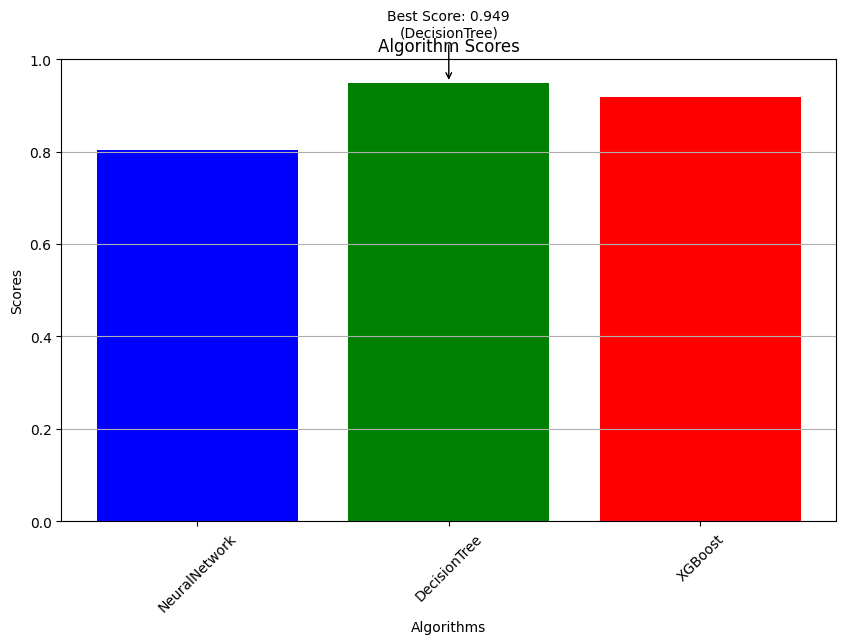

In [39]:
algorithms = ['NeuralNetwork', 'DecisionTree', 'XGBoost']
scores = [nn_r2, rgr_r2, xgb_r2]

best_algorithm_index = scores.index(max(scores))
best_algorithm = algorithms[best_algorithm_index]
best_score = scores[best_algorithm_index]

plt.figure(figsize=(10, 6))
plt.bar(algorithms, scores, color=['blue', 'green', 'red'])
plt.title('Algorithm Scores')
plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.annotate(f'Best Score: {best_score:.3f}\n({best_algorithm})',
             xy=(best_algorithm_index, best_score),
             xytext=(best_algorithm_index, best_score + 0.1),
             ha='center',
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()